# Time Series Correlation

Code from [Towards Data Science](https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9)

Other resources:
[Applied Time Series Analysis](https://nwfsc-timeseries.github.io/atsa-labs/sec-tslab-correlation-within-and-among-time-series.html)

In [385]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
import os
import glob
from sklearn.preprocessing import MinMaxScaler
from wearables import fitcosinor
from wearables import npmetrics

import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
mpl.style.use('seaborn-white')
# to change default colormap
plt.rcParams["image.cmap"] = "Set1"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)

data_dir = '/Volumes/schnyer/Megan/Wearables/data/'
results_dir = '/Volumes/schnyer/Megan/Wearables/results/'

In [382]:
n_days = 7
interpolate = True
recording_period_min = [7]

cr_measures = ['actmin', 'amp', 'alpha', 'beta', 'phi']
cols = [col + "_" + str(ndays) for ndays in recording_period_min for col in cr_measures]

np_measures = ['IS', 'IV', 'RA', 'L5_start', 'L5', 'M10_start', 'M10']
np_cols = [col + "_" + str(ndays) for ndays in recording_period_min for col in np_measures]

In [275]:
def readact_raw(in_file):
    with open(in_file) as f:
        for i, l in enumerate(f):
            if ' Epoch-by-Epoch Data ' in l:
                try:
                    data = pd.read_csv(
                        in_file, skiprows=i + 11)
                   
                except:
                    try:
                        data = pd.read_csv(
                            in_file, skiprows=i + 12)
                        print('successfully read Actiware data file')
                    except:
                        print('unable to read Actiware data file')
    return data

Organized fitbit files by subject

```bash

for subject in `ls /Volumes/schnyer/Megan/Wearables/data/raw/fitbit/`; do

    echo " scp /Volumes/schnyer/Megan/Wearables_old/data/fitbit/WA_${subject}_* /Volumes/schnyer/Megan/Wearables/data/raw/fitbit/${subject}/. "
    scp /Volumes/schnyer/Megan/Wearables_old/data/fitbit/WA_${subject}_* /Volumes/schnyer/Megan/Wearables/data/raw/fitbit/${subject}/.
done
```

In [347]:
act_files = sorted(glob.glob(data_dir + 'raw/actiwatch/[1-2]*New_Analysis.csv'))
fit_files = sorted(glob.glob(data_dir + 'raw/fitbit/*/WA_*minuteStepsNarrow*.csv'))
hr_files = sorted(glob.glob(data_dir + 'raw/fitbit/*/WA_*heartrate_1min*.csv'))

print('%.f actiwatch files, %.f fitbit files, %.f hr files' % (len(act_files), len(fit_files), len(hr_files)))

52 actiwatch files, 51 fitbit files, 50 hr files


Subject 10011
recording period is 13 days 23:27:00
new recording period is 7 days 00:00:00
missing 0.00 percent
Correlation for raw ts: 0.31
Correlation for normalized ts: 0.31
r active 0.61, r rest -0.01, r sleep -0.04


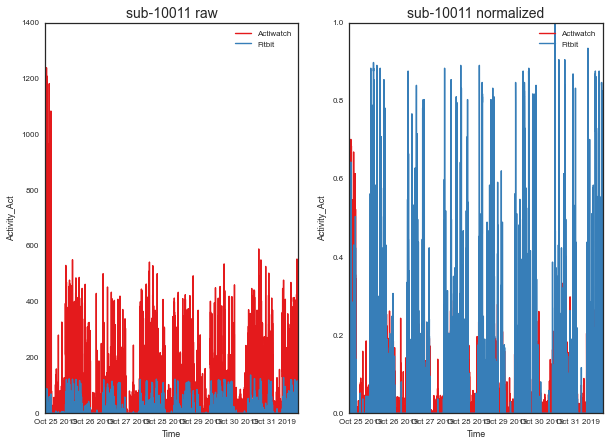

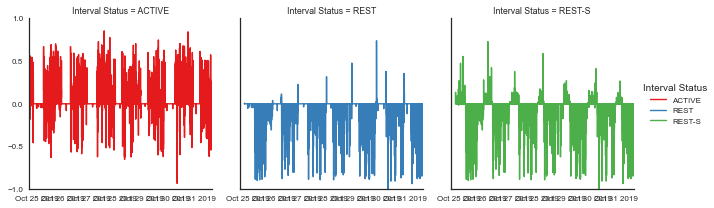





calculating cr measures for actiwatch data
     actmin       amp     alpha        beta        phi
0  1.175597  1.639357 -0.731702  409.530012  14.860634
         IS        IV        RA      L5_start        L5      M10_start  \
0  0.075909  2.167133  0.903862  [(5, 11, 0)]  5.282698  [(18, 29, 0)]   

          M10  
0  104.615909  



calculating cr measures for fitbit data
     actmin       amp     alpha        beta        phi
0  0.069857  1.337319 -0.625523  435.946222  14.365372
         IS        IV        RA      L5_start        L5      M10_start  \
0  0.210442  0.164206  0.994501  [(4, 56, 0)]  0.035714  [(16, 37, 0)]   

         M10  
0  12.953084  



Subject 10012
recording period is 6 days 15:56:00
new recording period is 7 days 00:00:00
missing 0.00 percent
Correlation for raw ts: 0.41
Correlation for normalized ts: 0.41
r active 0.76, r rest -0.02, r sleep -0.04


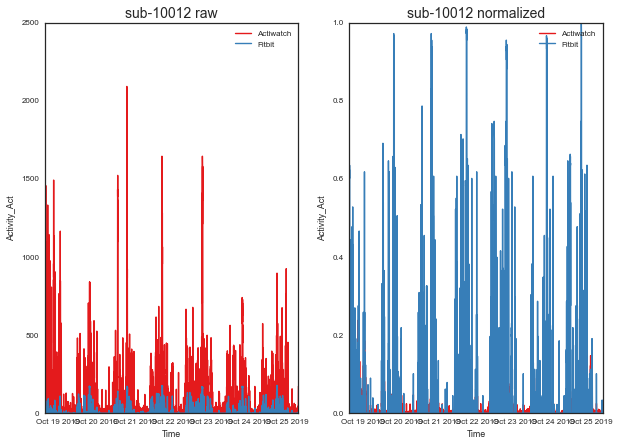

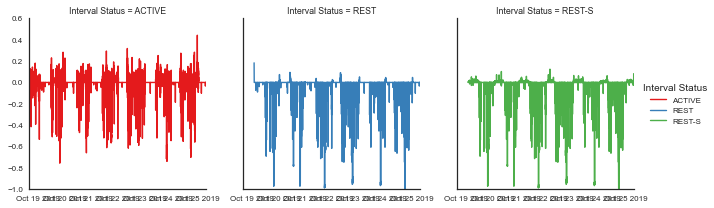





calculating cr measures for actiwatch data
     actmin       amp     alpha       beta        phi
0  1.226029  1.655063 -0.655752  15.020912  16.807761
         IS        IV        RA      L5_start        L5      M10_start  \
0  0.075122  2.082229  0.940046  [(6, 57, 0)]  4.093016  [(22, 18, 0)]   

          M10  
0  132.444786  



calculating cr measures for fitbit data
         actmin       amp     alpha     beta        phi
0  7.211486e-22  1.723924 -0.189561  2.94385  16.605329
         IS        IV        RA      L5_start        L5      M10_start  \
0  0.238561  0.076745  0.989852  [(6, 56, 0)]  0.092857  [(20, 33, 0)]   

         M10  
0  18.207632  



Subject 10014
recording period is 6 days 15:23:00
new recording period is 7 days 00:00:00
missing 0.00 percent
Correlation for raw ts: 0.30
Correlation for normalized ts: 0.30
r active 0.60, r rest -0.00, r sleep -0.02


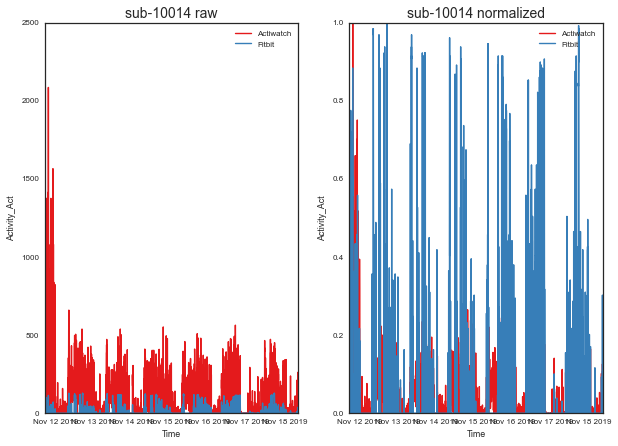

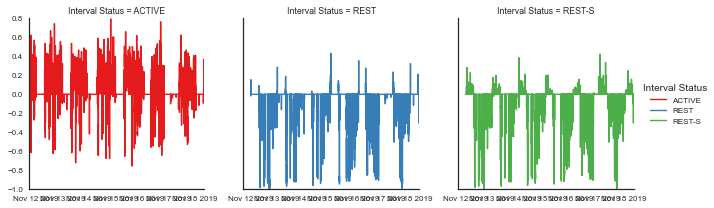





calculating cr measures for actiwatch data
     actmin       amp     alpha       beta        phi
0  1.253177  1.570551 -0.695311  14.186155  16.537938
         IS        IV        RA      L5_start       L5     M10_start       M10
0  0.098643  2.176645  0.936865  [(7, 29, 0)]  4.26127  [(18, 7, 0)]  130.7274



calculating cr measures for fitbit data
    actmin       amp     alpha       beta        phi
0  0.06133  1.214865 -0.549394  19.571097  15.857578
         IS        IV        RA      L5_start    L5      M10_start        M10
0  0.318342  0.107596  0.995553  [(7, 19, 0)]  0.03  [(18, 15, 0)]  13.462959



Subject 10016
recording period is 8 days 05:41:00
new recording period is 7 days 00:00:00
missing 0.00 percent
Correlation for raw ts: 0.39
Correlation for normalized ts: 0.39
r active 0.75, r rest -0.02, r sleep -0.03


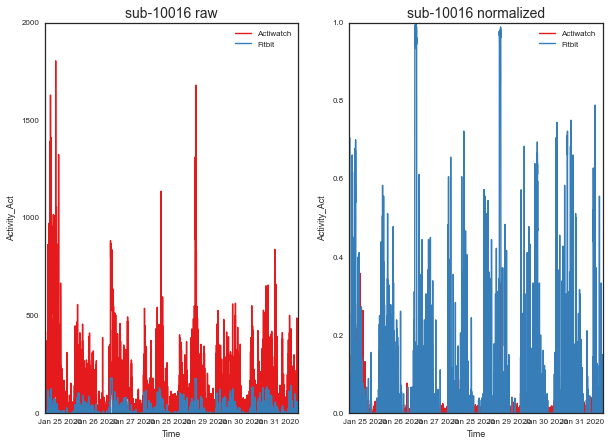

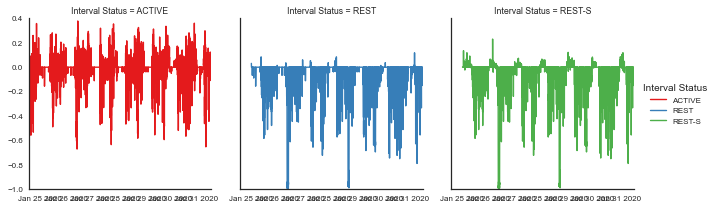





calculating cr measures for actiwatch data
     actmin       amp   alpha       beta        phi
0  1.625093  1.312952 -0.7027  46.365866  15.080738
         IS        IV        RA      L5_start        L5      M10_start  \
0  0.076437  2.130655  0.877794  [(5, 44, 0)]  8.880635  [(20, 12, 0)]   

          M10  
0  136.457664  



calculating cr measures for fitbit data
     actmin      amp     alpha       beta        phi
0  0.092237  1.42705 -0.544924  10.601151  14.694946
         IS        IV        RA     L5_start        L5      M10_start  \
0  0.191609  0.082882  0.977252  [(6, 1, 0)]  0.168571  [(18, 44, 0)]   

         M10  
0  14.652464  



Subject 10023
recording period is 13 days 00:29:00
new recording period is 7 days 00:00:00
missing 0.00 percent
Correlation for raw ts: 0.33
Correlation for normalized ts: 0.33
r active 0.63, r rest -0.01, r sleep -0.03


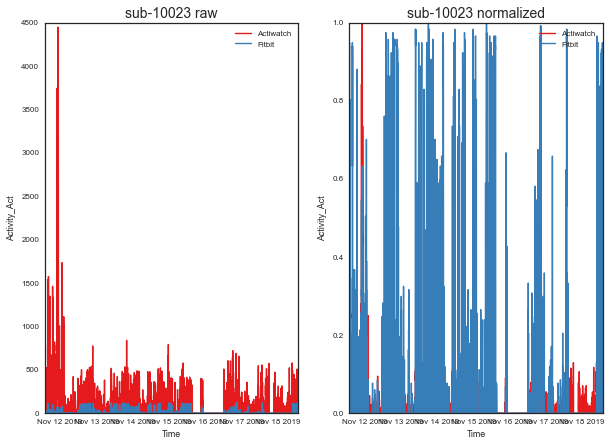

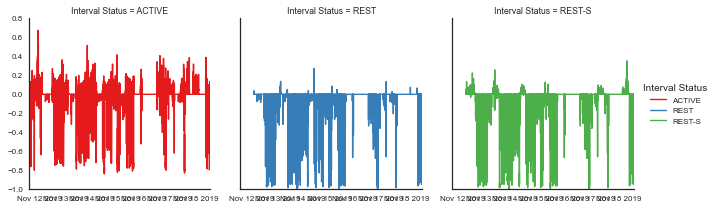





calculating cr measures for actiwatch data
     actmin  amp     alpha       beta        phi
0  0.874963  2.0 -0.946881  13.140628  18.223705
         IS        IV        RA      L5_start         L5      M10_start  \
0  0.064235  1.718498  0.754899  [(9, 16, 0)]  17.614762  [(22, 52, 0)]   

          M10  
0  126.120071  



calculating cr measures for fitbit data
         actmin       amp   alpha      beta       phi
0  2.297915e-16  1.447428 -0.6679  3.400548  17.54056
         IS        IV        RA      L5_start        L5      M10_start  \
0  0.182377  0.090897  0.794133  [(9, 18, 0)]  1.332857  [(21, 45, 0)]   

        M10  
0  11.61586  



Subject 10024
recording period is 13 days 17:32:00
new recording period is 7 days 00:00:00
missing 0.00 percent
Correlation for raw ts: 0.30
Correlation for normalized ts: 0.30
r active 0.55, r rest -0.02, r sleep -0.04


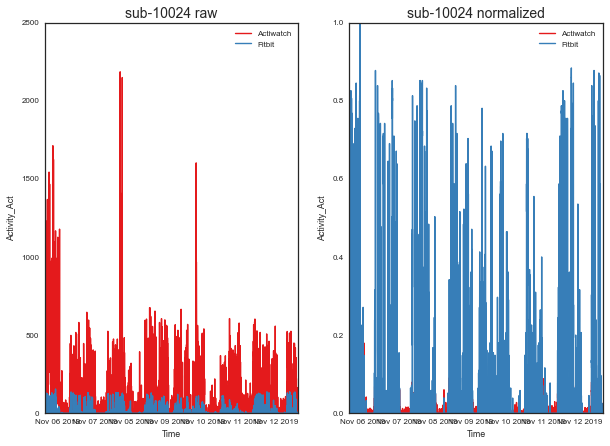

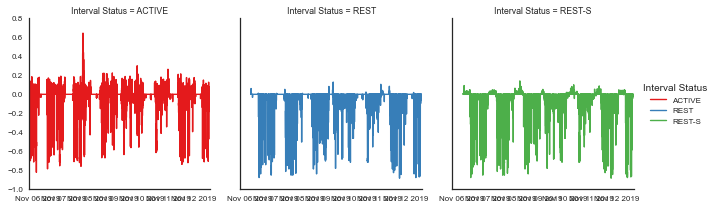





calculating cr measures for actiwatch data
     actmin       amp     alpha        beta        phi
0  1.394062  1.535712 -0.840453  151.816555  15.278592
         IS        IV       RA     L5_start         L5     M10_start  \
0  0.070646  2.124426  0.87342  [(6, 1, 0)]  10.294284  [(22, 7, 0)]   

          M10  
0  152.357928  



calculating cr measures for fitbit data
         actmin       amp     alpha      beta        phi
0  1.302789e-15  1.568183 -0.657128  6.995204  15.878958
         IS        IV        RA     L5_start        L5      M10_start  \
0  0.176347  0.136244  0.950282  [(6, 1, 0)]  0.341303  [(22, 13, 0)]   

         M10  
0  13.388146  



Subject 10025
recording period is 13 days 20:49:00
new recording period is 7 days 00:00:00
missing 0.00 percent
Correlation for raw ts: 0.33
Correlation for normalized ts: 0.33
r active 0.61, r rest -0.01, r sleep -0.05


In [ ]:
cordf = []
group_dict = {}

for file in act_files:
    try:
        subject = file.split('actiwatch/')[1][0:5]
        print('Subject %s' % subject)
        group_dict[subject] = {}

        act = readact_raw(file)
        act['Time'] = pd.to_datetime(act['Date'] + ' ' + act['Time'])
        act = act.set_index('Time')
        act = act.groupby(['Interval Status']).resample('1T').sum().reset_index().set_index('Time')[['Activity', 'Interval Status']]

        fit_file = list(filter(lambda x: subject in x, fit_files))[0]
        hr_file = list(filter(lambda x: subject in x, hr_files))[0]

        hr = pd.read_csv(hr_file, index_col='Time', parse_dates=True)


        if len(fit_file) != 0:
            fit = pd.read_csv(fit_file, header=None, names = ['Time', 'Activity'], skiprows=1) #this wont work bc is preproc file
            fit['Time'] = pd.to_datetime(fit['Time'])

            # set missing activity values to na instead of 0 based on hr data
            fit = pd.merge(fit, hr, on='Time')
            fit['Activity'][fit['Value'] == 0] = np.nan

            fit = fit.set_index(fit['Time'])
            fit = fit.resample('1T').sum()

            df = act.join(fit, how = 'outer', lsuffix='_Act', rsuffix='_Fit').dropna(subset=['Activity_Act'])

            # eliminate time points with missing fitbit values at the beginning & end
            first_idx = df['Activity_Fit'].first_valid_index()
            last_idx = df['Activity_Fit'].last_valid_index()
            df = df.loc[first_idx:last_idx]

            print('recording period is %s' % (last_idx - first_idx))
            group_dict[subject]['raw'] = df

            # truncate to first n days
            last_idx_n = first_idx + dt.timedelta(days=n_days)
            df = df.loc[first_idx:last_idx_n]
            group_dict[subject][str(n_days)] = df
            
            print('new recording period is %s' % (last_idx_n - first_idx))

            # calculate percent missing
            missing = df['Activity_Fit'].isnull().sum()/len(df['Activity_Fit'])
            print('missing %.2f percent' % (missing * 100))

            # interpolate
            if interpolate == True:
                df['Activity_Fit'].interpolate(method='linear', limit=10, inplace=True)
            group_dict[subject][str(n_days) + '+interpolated'] = df
            
            # correlation
            r = df[['Activity_Act', 'Activity_Fit']].corr().iloc[0::2,-1][0]
            print('Correlation for raw ts: %.2f' % r)

            #normalized data 
            scaler = MinMaxScaler()
            df_norm = df.copy()
            df_norm[['Activity_Act', 'Activity_Fit']] = scaler.fit_transform(df_norm[['Activity_Act', 'Activity_Fit']])
            group_dict[subject]['preproc+norm'] = df_norm
            
            # correlation
            r_norm = df_norm[['Activity_Act', 'Activity_Fit']].corr().iloc[0::2,-1][0]
            print('Correlation for normalized ts: %.2f' % r_norm)

            # correlation by interval type
            r_active, r_rest, r_sleep = df_norm.groupby('Interval Status')[['Activity_Act', 'Activity_Fit']].corr().iloc[0::2,-1].to_list()
            print('r active %.2f, r rest %.2f, r sleep %.2f' % (r_active, r_rest, r_sleep))

            cordf.append([[subject, missing, r, r_norm, r_active, r_rest, r_sleep]])
            group_dict[subject]['correlations'] = cordf
            
            # save results
            np.save(results_dir + 'group_results.npy', group_dict)
            np.save(results_dir + '%s_results.npy' % subject, group_dict[subject])
            
            # plot raw and normalized ts
            fig, axes = plt.subplots(1,2, figsize=(10,7))

            sns.lineplot(x = 'Time', y = 'Activity_Act', data = df.reset_index(), label = 'Actiwatch', ci=None ,ax = axes[0])
            sns.lineplot(x = 'Time', y = 'Activity_Fit', data = df.reset_index(), label = 'Fitbit', ci=None, ax = axes[0])
            axes[0].set_title('sub-%s raw' % subject, fontsize = 14)

            sns.lineplot(x = 'Time', y = 'Activity_Act', data = df_norm.reset_index(), label = 'Actiwatch', ci=None, ax = axes[1])
            sns.lineplot(x = 'Time', y = 'Activity_Fit', data = df_norm.reset_index(), label = 'Fitbit', ci=None, ax = axes[1])
            axes[1].set_title('sub-%s normalized' % subject, fontsize = 14)

            plt.show()

            # plot ts by interval type
            df_norm['Act-Fit'] = df_norm['Activity_Act'] - df_norm['Activity_Fit']
            g = sns.FacetGrid(df_norm.reset_index(), col="Interval Status", hue="Interval Status")
            g.map_dataframe(sns.lineplot, x="Time", y="Act-Fit", ci=None, palette = 'Set1')
            g.add_legend()

            plt.show()
            plt.close()

            print('\n\n\n')
            
            # calculate cosinor cr measures
            print('calculating cr measures for actiwatch data')
            group_dict[subject]['cosinor_act'] = fitcosinor.fitcosinor(df.rename(columns = {'Activity_Act':'Activity'})['Activity'], transform = 'antilogistic')[0]
            np.save(results_dir + '%s_results.npy' % subject, group_dict[subject])
            
            # calculate non-parametric cr measures
            group_dict[subject]['nonpar_act'] = pd.DataFrame(npmetrics.np_metrics_all(df.rename(columns = {'Activity_Act':'Activity'})['Activity'])).transpose()
            group_dict[subject]['nonpar_act'].columns = np_measures
            np.save(results_dir + '%s_results.npy' % subject, group_dict[subject])
            print(group_dict[subject]['nonpar_act'])
            
            print('\n\n')
            
            # calculate cosinor cr measures
            print('calculating cr measures for fitbit data')
            group_dict[subject]['cosinor_fit'] = fitcosinor.fitcosinor(df.rename(columns = {'Activity_Fit':'Activity'})['Activity'], transform = 'antilogistic')[0]
            np.save(results_dir + '%s_results.npy' % subject, group_dict[subject])
        
            # calculate non-parametric cr measures
            group_dict[subject]['nonpar_fit'] = pd.DataFrame(npmetrics.np_metrics_all(df.rename(columns = {'Activity_Fit':'Activity'})['Activity'])).transpose()
            group_dict[subject]['nonpar_fit'].columns = np_measures
            np.save(results_dir + '%s_results.npy' % subject, group_dict[subject])
            np.save(results_dir + 'group_results.npy', group_dict)
            print(group_dict[subject]['nonpar_fit'])
            
            print('\n\n')
            
        else:
            print('no matching fitbit file')
    
    except Exception as e:
        print(e)
